In [2]:
#tải thư viện
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

os.chdir("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK") #thư mục đang làm việc

#Bước 1: Tải dữ liệu
train = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")
test = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/test.csv")

#Bước 2: Khai thác dữ liệu
#xem một số dòng
print(train.head())

#xem thống kê dữ liệu
print(train.describe());

#loại bỏ các cột không cần thiết
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_train = train.drop(d_col , axis=1).copy()
drop_train

C:\Users\thaov\AppData\Local\Temp\ipykernel_17148\2523816622.py:14: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/credit score classification/train.csv")


       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     C

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
#Explore the NAN value in the dataset(số lượng giá trị lỗi NaN trong mỗi cột)
drop_train.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [4]:
#Drop it
drop_na = drop_train.dropna().copy()

In [5]:
#hiển thị 10 dòng đầu
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167062043,Good
8,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.69062692529184,Standard
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912142650067,Good
10,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.46647639764313,Standard
11,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241330048,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.8670318506144,Good


In [6]:
#kiểm tra hàng trùng lặp
drop_na.duplicated().any()

False

In [7]:
#kiểm tra các giá trị duy nhất của từng cột
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3  5  8  7 13 10  0  4  1  9 11 -1 30 31 34 27 14  2 -2 16 17 15 23 22
 12 18 19 51 53 26 48 43 52 28 25 20 49 61 29 50 58 45  6 55 56 59 57 54
 62 67 36 41 21 24 65 33 32 39 47 46 60 64 35 44 38 -3 63 42 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '4' '8_' '1' '-1' '3_' '0' '8' '6' '5' '3' '9' '12' '15' '17' '2'
 '2_' '14' '11' '20' '22' '10' '13' '13_' '14_' '16' '12_' '18' '19' '23'
 '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '25' '10_'
 '183_' '9_' '1106' '834' '19_' '24_' '23_' '2672' '20_' '2008' '-3' '538'
 '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707' '26_' '18_' '28'
 '17_' '5_' '1867' '2250'

In [8]:
#Drop the incorrect data
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

Đoạn mã trên được sử dụng để loại bỏ các hàng trong DataFrame drop_na mà cột "Occupation" hoặc cột "Payment_Behaviour" chứa các giá trị không chính xác.

drop_na['Occupation'].str.contains('_______') == False: Phương thức str.contains() được sử dụng để kiểm tra xem mỗi giá trị trong cột "Occupation" có chứa chuỗi '' không. Nếu giá trị nào chứa chuỗi này, điều kiện này sẽ trả về False, ngược lại sẽ trả về True. Vì chúng ta muốn loại bỏ các hàng chứa giá trị không chính xác, nên chúng ta sử dụng == False để đảo ngược kết quả, tức là chỉ giữ lại các hàng mà giá trị trong cột "Occupation" không chứa chuỗi ''.

drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False: Tương tự như trên, điều này kiểm tra xem mỗi giá trị trong cột "Payment_Behaviour" có chứa chuỗi '!@9#%8' không và loại bỏ các hàng chứa chuỗi này.

Sau khi thực hiện các dòng mã trên, DataFrame drop_na sẽ chỉ chứa các hàng mà cột "Occupation" không chứa chuỗi '_______' và cột "Payment_Behaviour" không chứa chuỗi '!@9#%8'.

In [9]:
#Sửa lại toàn bộ bảng dữ liệu sai
sym = "\\`*_{}[]()>#@+!$:;"  #ký tự không hợp lệ
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income'] #các cột dạng số
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score'] #các cột dạng chuỗi
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'') #thay thế bằng chuỗi rỗng
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()

C:\Users\thaov\AppData\Local\Temp\ipykernel_17148\1063419540.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  drop_na[i] = drop_na[i].astype(str).str.replace(c,'') #thay thế bằng chuỗi rỗng


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


In [10]:
#Chuyển chuỗi thành giá trị số
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,Low_spent_Small_value_payments,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,High_spent_Large_value_payments,484.5912142650067,Good


In [11]:
#Chuyển đổi thông tin thành giá trị theo cấp độ
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921489417,1,244.5653167062043,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.816214573128885,6,484.5912142650067,Good


In [12]:
#Chuyển dữ liệu chữ thành số
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [13]:
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29.0,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


In [14]:
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [15]:
#Trích xuất giá trị số nguyên của cột Age
import re
def extract_numeric(value):
    match = re.search(r'\d+', str(value))  #tìm kiếm một chuỗi số (\d+) trong giá trị (value) của cột "Age"
    if match:
        return int(match.group())   #Trả về chuỗi kết quả từ sự khớp được tìm thấy, Chuyển đổi chuỗi số thành kiểu dữ liệu số nguyên.
    else:
        return None

drop_na['Age'] = drop_na['Age'].apply(extract_numeric)

In [16]:
#lọc giá trị cột Age từ 0-150
drop_na['Age'] = drop_na['Age'].astype(int) #Chuyển đổi kiểu dữ liệu của cột "Age" sang kiểu số nguyên, đảm bảo rằng tất cả các giá trị trong cột này đều là số nguyên.
drop_na = drop_na[(drop_na['Age'] >= 0) & (drop_na['Age'] <= 150)]

In [17]:
#số lượng hàng hiện tại
drop_na.count()

Age                       69830
Occupation                69830
Annual_Income             69830
Delay_from_due_date       69830
Num_of_Delayed_Payment    69830
Outstanding_Debt          69830
Credit_History_Age        69830
Payment_of_Min_Amount     69830
Total_EMI_per_month       69830
Payment_Behaviour         69830
Monthly_Balance           69830
Credit_Score              69830
dtype: int64

In [18]:
 #xóa hàng trùng lặp
drop_na = drop_na.drop_duplicates()
drop_na.count()

Age                       69830
Occupation                69830
Annual_Income             69830
Delay_from_due_date       69830
Num_of_Delayed_Payment    69830
Outstanding_Debt          69830
Credit_History_Age        69830
Payment_of_Min_Amount     69830
Total_EMI_per_month       69830
Payment_Behaviour         69830
Monthly_Balance           69830
Credit_Score              69830
dtype: int64

In [19]:
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


In [20]:
train_cleaned = drop_na
train_cleaned.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,69830.000000,6.983000e+04,69830.000000,69830.000000,69830.000000,69830.000000,69830.000000,69830.000000,69830.000000,6.983000e+04,69830.000000
mean,33.351353,1.759218e+05,21.053544,31.132107,1422.347181,18.389835,1.237863,1395.898597,3.271932,-3.341448e+22,1.886754
std,10.827750,1.437156e+06,14.867198,227.706629,1151.392869,8.289925,0.648614,8261.825886,1.845736,3.337245e+24,0.674879
min,14.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.933483e+04,10.000000,9.000000,565.720000,12.100000,1.000000,30.138053,1.000000,2.698418e+02,1.000000
50%,33.000000,3.696676e+04,18.000000,14.000000,1163.470000,18.200000,1.000000,68.404215,3.000000,3.363865e+02,2.000000
75%,42.000000,7.230696e+04,28.000000,18.000000,1940.490000,25.100000,2.000000,156.604085,5.000000,4.709015e+02,2.000000
max,142.000000,2.419806e+07,67.000000,4397.000000,4998.070000,33.800000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [21]:
#Loại bỏ ngoại lệ bằng cách sử dụng phương pháp IQR.
Q1 = train_cleaned.Annual_Income.quantile(0.25)
Q3 = train_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
train_cleaned = train_cleaned.drop(train_cleaned.loc[train_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
train_cleaned = train_cleaned.drop(train_cleaned.loc[train_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
train_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,29,Architect,20002.88,33.0,25.0,3571.70,6.3,1,60.964772,6.0,337.362988,2
99994,25,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1


<AxesSubplot:xlabel='Annual_Income'>

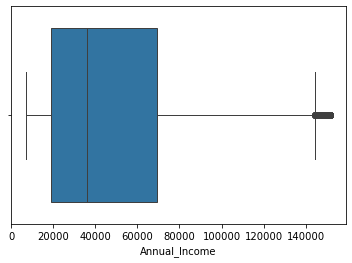

In [22]:
#tổng quan về phân phối của thu nhập hàng năm và xác định xem có ngoại lệ nào không.
sns.boxplot(x=train_cleaned['Annual_Income'])

<AxesSubplot:xlabel='Outstanding_Debt'>

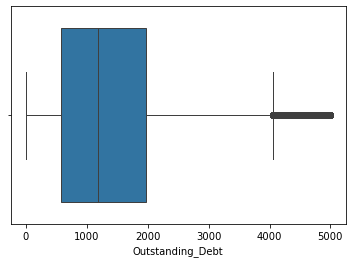

In [23]:
#phân phối của số nợ còn lại và xác định xem có ngoại lệ nào không
sns.boxplot(x=train_cleaned['Outstanding_Debt'])

In [24]:
#số lượng mẫu trong mỗi nhóm nghề nghiệp
occupation_count = train_cleaned['Occupation'].value_counts(dropna = False) #bao gồm cả giá trị NaN nếu có trong cột
occupation_count

Lawyer           4770
Teacher          4636
Mechanic         4619
Engineer         4617
Architect        4598
Scientist        4578
Entrepreneur     4558
Accountant       4535
Media_Manager    4532
Developer        4496
Journalist       4471
Doctor           4454
Musician         4354
Manager          4349
Writer           4314
Name: Occupation, dtype: int64

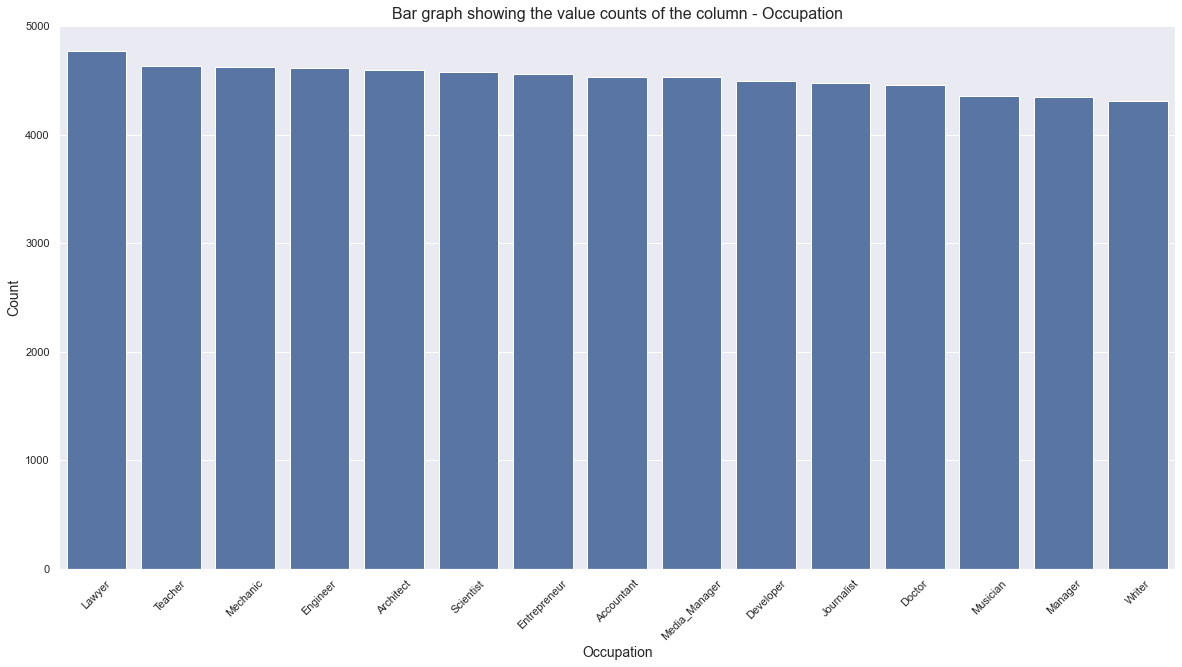

In [25]:
#số lượng mẫu trong mỗi nhóm nghề nghiệp
sns.set(rc={'figure.figsize': (20, 10)})  #kích thước biểu đồ
sns.barplot(x=occupation_count.index, y=occupation_count.values) # x là các nhóm nghề nghiệp và trục y là số lượng mẫu
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45) #xoay nhãn trục x
plt.show()

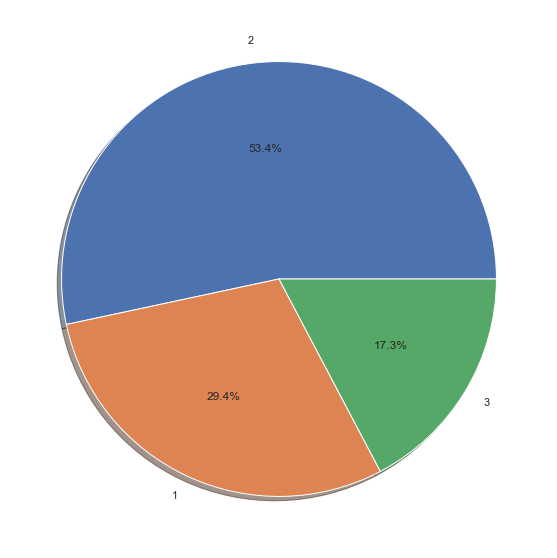

In [26]:
# phân phối của các nhãn trong cột "Credit_Score"
label = train_cleaned.Credit_Score.value_counts().index
label_count = train_cleaned.Credit_Score.value_counts().values
plt.pie(data=train_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.093023,-0.173143,0.001358,-0.202353,0.234206,0.185696,0.000923,0.033029,-0.002391,0.160786
Annual_Income,0.093023,1.000000,-0.227381,0.002878,-0.264309,0.259222,0.179454,0.008248,0.332777,-0.004454,0.193939
Delay_from_due_date,-0.173143,-0.227381,1.000000,0.010782,0.569789,-0.484996,-0.333194,-0.005463,-0.078878,0.003893,-0.429198
Num_of_Delayed_Payment,0.001358,0.002878,0.010782,1.000000,0.008015,-0.008178,-0.006479,-0.000321,0.007264,0.000896,-0.007843
Outstanding_Debt,-0.202353,-0.264309,0.569789,0.008015,1.000000,-0.627050,-0.324285,-0.007305,-0.094883,0.000518,-0.383912
Credit_History_Age,0.234206,0.259222,-0.484996,-0.008178,-0.627050,1.000000,0.385210,0.006838,0.089458,-0.002261,0.386778
Payment_of_Min_Amount,0.185696,0.179454,-0.333194,-0.006479,-0.324285,0.385210,1.000000,-0.001414,0.061784,-0.000912,0.287928
Total_EMI_per_month,0.000923,0.008248,-0.005463,-0.000321,-0.007305,0.006838,-0.001414,1.000000,0.003207,0.001564,0.006557
Payment_Behaviour,0.033029,0.332777,-0.078878,0.007264,-0.094883,0.089458,0.061784,0.003207,1.000000,0.002988,0.116677
Monthly_Balance,-0.002391,-0.004454,0.003893,0.000896,0.000518,-0.002261,-0.000912,0.001564,0.002988,1.000000,-0.001825


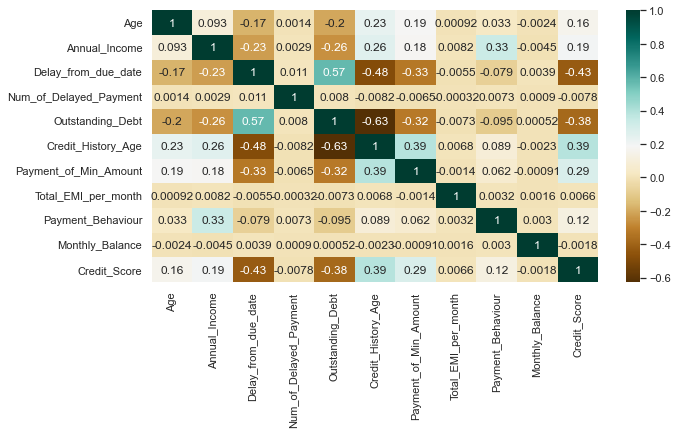

In [27]:
#hiển thị mối tương quan giữa các cặp biến
plt.figure(figsize=(10,5))
c= train_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>],
       [<AxesSubplot:title={'center':'Payment_of_Min_Amount'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:title={'center':'Payment_Behaviour'}>],
       [<AxesSubplot:title={'center':'Monthly_Balance'}>,
        <AxesSubplot:title={'center':'Credit_Score'}>, <AxesSubplot:>]],
      dtype=object)

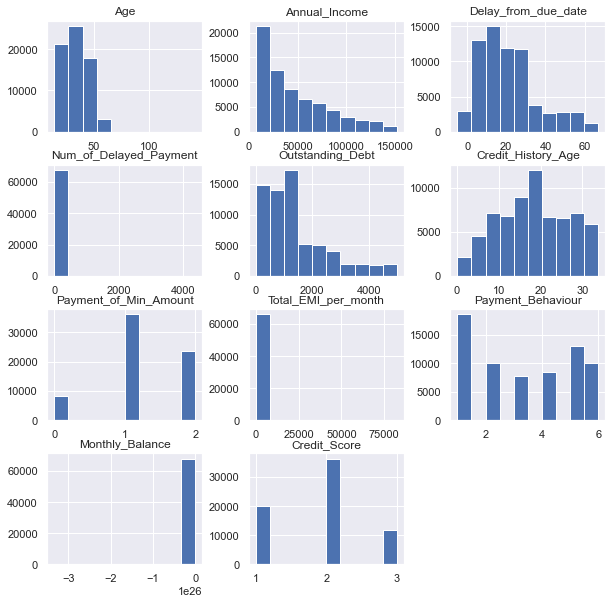

In [28]:
#phân phối của các biến trong dữ liệu
train_cleaned.hist(figsize=(10, 10)) #kích thước là 10x10

In [29]:
train_cleaned.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


In [30]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in train_cleaned[col_float]:
  train_cleaned[i] = scaler.fit_transform(train_cleaned[[i]])
train_cleaned.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.070312,Scientist,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,3
3,0.070312,Scientist,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,3
6,0.070312,Scientist,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,3
9,0.109375,Teacher,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,3
10,0.109375,Teacher,0.192389,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,1.0,2


Đoạn mã trên sử dụng phương pháp Min-Max Scaling để chuẩn hóa các biến số (numerical variables) trong danh sách col_float của DataFrame train_cleaned.

scaler = MinMaxScaler(): Khởi tạo một đối tượng MinMaxScaler() để thực hiện quá trình chuẩn hóa Min-Max.

col_float: Là danh sách các biến số cần được chuẩn hóa.

Vòng lặp for i in train_cleaned[col_float] duyệt qua từng biến trong danh sách col_float.

Trong mỗi vòng lặp:

scaler.fit_transform(train_cleaned[[i]]): Sử dụng phương thức fit_transform() của đối tượng scaler để chuẩn hóa biến i theo phương pháp Min-Max Scaling.
Kết quả được gán trở lại cột i trong DataFrame df_cleaned.

Kết quả là các biến số trong danh sách col_float đã được chuẩn hóa Min-Max và được ghi lại trong DataFrame train_cleaned.

Encoding

In [31]:
#Danh sách các cột
train_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [32]:
train_cleaned = pd.get_dummies(train_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
train_cleaned.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.070312,0.083668,0.111111,0.002273,0.162020,0.652819,2,0.000602,4.0,1.0,...,0,0,0,0,0,0,0,1,0,0
3,0.070312,0.083668,0.138889,0.001591,0.162020,0.661721,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,0.070312,0.083668,0.111111,0.002500,0.162020,0.670623,2,0.000602,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
9,0.109375,0.192389,0.166667,0.000909,0.121012,0.792285,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0
10,0.109375,0.192389,0.111111,0.000455,0.121012,0.795252,2,0.000229,6.0,1.0,...,0,0,0,0,0,0,0,0,1,0


Đoạn mã trên sử dụng phương pháp One-Hot Encoding để biến đổi biến phân loại "Occupation" trong DataFrame `train_cleaned` thành các biến giả định (dummy variables).

- `pd.get_dummies(train_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)`: Sử dụng phương thức `get_dummies()` của pandas để thực hiện One-Hot Encoding.
  - `train_cleaned`: DataFrame chứa dữ liệu cần biến đổi.
  - `prefix='Occupation'`: Tiền tố của tên các biến giả định được tạo ra từ One-Hot Encoding.
  - `columns=['Occupation']`: Cột "Occupation" sẽ được biến đổi.
  - `drop_first=False`: Không loại bỏ cột đầu tiên sau khi biến đổi.

Kết quả là DataFrame `train_cleaned` sẽ bao gồm các biến giả định mới được tạo ra từ One-Hot Encoding, mỗi biến giả định tương ứng với một nhóm nghề nghiệp (Occupation) và chứa các giá trị 0 hoặc 1 để biểu thị sự hiện diện của từng nhóm nghề nghiệp.

In [33]:
#Gán tất cả các cột vào biến feed
feed = train_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [34]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

Mã trên thực hiện việc chia dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng hàm train_test_split từ thư viện sklearn.

df_train_x = feed.drop('Credit_Score',axis = 1): Tạo DataFrame df_train_x bằng cách loại bỏ cột 'Credit_Score' từ DataFrame feed. Đây là tập dữ liệu đầu vào cho việc huấn luyện mô hình.

df_train_y = feed['Credit_Score']: Tạo Series df_train_y từ cột 'Credit_Score' của DataFrame feed. Đây là tập dữ liệu đầu ra (labels) cho việc huấn luyện mô hình.

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42): Chia dữ liệu thành tập huấn luyện và tập kiểm tra với tỷ lệ 80-20. Cụ thể:

df_train_x: Tập dữ liệu đầu vào.
df_train_y: Tập dữ liệu đầu ra.
test_size=0.20: Tỉ lệ dữ liệu được chia cho tập kiểm tra là 20%.
random_state=42: Đặt một giá trị seed để đảm bảo kết quả phân chia dữ liệu là cố định.
Kết quả là bạn sẽ có các biến x_train, x_test, y_train, y_test chứa dữ liệu cho quá trình huấn luyện và kiểm tra mô hình. x_train và y_train là dữ liệu đầu vào và đầu ra cho việc huấn luyện mô hình, còn x_test và y_test là dữ liệu đầu vào và đầu ra cho việc kiểm tra hiệu suất của mô hình.

In [59]:
# Lưu tập huấn luyện và tập kiểm tra vào các file
train_file_path = 'C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/x_y_train.csv'
test_file_path = 'C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/x_y_test.csv'

# Lưu tập huấn luyện
train_data = pd.concat([x_train, y_train], axis=1)
train_data.to_csv(train_file_path, index=False)

# Lưu tập kiểm tra
test_data = pd.concat([x_test, y_test], axis=1)
test_data.to_csv(test_file_path, index=False)

(train_file_path, test_file_path)

('C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/x_y_train.csv',
 'C:/Users/thaov/Downloads/Quản trị dữ liệu với APACHE SPARK/x_y_test.csv')